## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd


wine = datasets.load_wine()
print(pd.Series(wine.target).value_counts())
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size = .3,random_state = 9)

df = pd.DataFrame(wine['data'])
df.columns = (wine['feature_names'])
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)
predict_y = model.predict(x_test)

print(f"accuracy_score = {accuracy_score(predict_y,y_test)}")

print(f"predict_y:{predict_y}")
print(f"y_test:       {y_test}")


1    71
0    59
2    48
dtype: int64
accuracy_score = 0.8518518518518519
predict_y:[0 1 0 2 0 0 2 2 2 1 2 0 2 1 1 0 1 1 0 1 0 0 1 0 0 2 1 1 0 1 0 1 1 1 1 2 1
 0 1 1 2 0 0 1 2 0 1 1 2 0 2 1 1 0]
y_test:       [0 0 0 2 0 0 2 2 2 1 2 0 2 1 1 0 1 1 0 0 0 0 0 0 0 2 1 1 0 1 0 1 1 0 1 2 2
 0 1 1 2 0 0 2 2 0 0 0 2 0 2 1 1 0]


In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

boston = datasets.load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = .15,random_state = 9)

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
predict_y = model.predict(x_test)

print(f"mean_squared_error:{mean_squared_error(predict_y,y_test)}")

print(f"cross_val_score:{cross_val_score(model,x_test,y_test,cv = 5).mean()}")



#df = pd.DataFrame(data = x_test, columns = boston.feature_names)
#for col in df.columns:
 #   plt.scatter(df[col],y_test,label = col)

#plt.plot(x_test,predict_y)
#plt.show()

mean_squared_error:16.735000000000003
cross_val_score:0.6110339672616849


In [207]:
feat = pd.Series(data = model.feature_importances_,index = boston.feature_names)
feat_names  = list(feat.sort_values(ascending = False).index)
print(feat_names)


['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE', 'TAX', 'INDUS', 'B', 'CHAS', 'ZN', 'RAD']


mean_squared_error:31.737894736842097
cross_val_score = 0.7226287375961759


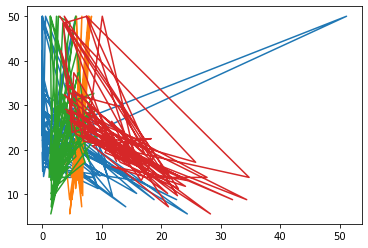

In [208]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
train_X = df[df.columns[feat > .05]]
x_train,x_test,y_train,y_test = train_test_split(train_X,boston.target,test_size = .15,random_state = 9)
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

predict_y = model.predict(x_test)
print(f"mean_squared_error:{mean_squared_error(predict_y,y_test)}")

print(f"cross_val_score = {cross_val_score(model,x_test,y_test,cv = 5).mean()}")

#for col in df:
#    plt.scatter(df[col],boston.target)
    
plt.plot(x_test,predict_y)
plt.show()